<a href="https://colab.research.google.com/github/riyazahamed12/Bike-Analysis-using-EDA/blob/main/Bike_Analysis_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U pandasql
from pandasql import sqldf
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel("bike_information.xlsx")

In [7]:
df.isnull().any()

bike_name              False
Engine Capacity        False
Transmission_x         False
colors                 False
price                  False
                       ...  
Additional features    False
Mileage                False
Fuel Tank Capacity     False
Kerb Weight            False
Seat Height            False
Length: 89, dtype: bool

In [8]:
df.isnull().sum()

bike_name              0
Engine Capacity        0
Transmission_x         0
colors                 0
price                  0
                      ..
Additional features    0
Mileage                0
Fuel Tank Capacity     0
Kerb Weight            0
Seat Height            0
Length: 89, dtype: int64

In [9]:
df.head()

,bike_name,Engine Capacity,Transmission_x,colors,price,Displacement,Max Power,Max Torque,Riding Range,Top Speed,...,Stepped Seat,Pillion Backrest,Pillion Grabrail,Pillion Seat,Pillion Footrest,Additional features,Mileage,Fuel Tank Capacity,Kerb Weight,Seat Height
0,Ducati Panigale V4,"1,103 cc",6 Speed Manual,"Ducati Red (Std),Ducati Red (S),Matte Carbon","₹ 27,41,000",1103 cc,212.5 bhp @ 13000 rpm,123.6 Nm @ 9500 rpm,221 Km,299+ Kmph,...,Yes,No,No,Yes,Yes,"Riding Modes, Power Modes",8.666667,17 litres,198.5 kg,850 mm
1,Ducati Streetfighter V4,"1,103 cc",6 Speed Manual,"Ducati Red (Standard),Dark Stealth,Ducati Red (S)","₹ 22,15,000",1103 cc,205.17 bhp @ 12750 rpm,123 Nm @ 9500 rpm,210.4 Km,299+ Kmph,...,Yes,No,Yes,Yes,Yes,"Riding Modes, Power Modes",8.766667,16 litres,201 kg,845 mm
2,Indian Chief Dark Horse,"1,890 cc",6 Speed Manual,"Black Smoke,Stealth gray,Alumina Jade Smoke","20,20,000","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,No,No,No,No,No,Riding Modes,9.333333,15.1 litres,304 kg,662 mm
3,Indian Chief Bobber Dark Horse,"1,890 cc",6 Speed Manual,"Black Smoke,Titanium Smoke,Sagebrush Smoke","21,39,925","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,No,No,No,No,No,Riding Modes,9.333333,15.1 litres,315 kg,662 mm
4,Indian Super Chief Limited,"1,890 cc",6 Speed Manual,"Blue Slate Metallic,Black Metallic,Maroon Meta...","22,82,155","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,Yes,No,Yes,Yes,Yes,Riding Modes,9.333333,15.1 litres,335 kg,665 mm


In [10]:
df.head(3)

,bike_name,Engine Capacity,Transmission_x,colors,price,Displacement,Max Power,Max Torque,Riding Range,Top Speed,...,Stepped Seat,Pillion Backrest,Pillion Grabrail,Pillion Seat,Pillion Footrest,Additional features,Mileage,Fuel Tank Capacity,Kerb Weight,Seat Height
0,Ducati Panigale V4,"1,103 cc",6 Speed Manual,"Ducati Red (Std),Ducati Red (S),Matte Carbon","₹ 27,41,000",1103 cc,212.5 bhp @ 13000 rpm,123.6 Nm @ 9500 rpm,221 Km,299+ Kmph,...,Yes,No,No,Yes,Yes,"Riding Modes, Power Modes",8.666667,17 litres,198.5 kg,850 mm
1,Ducati Streetfighter V4,"1,103 cc",6 Speed Manual,"Ducati Red (Standard),Dark Stealth,Ducati Red (S)","₹ 22,15,000",1103 cc,205.17 bhp @ 12750 rpm,123 Nm @ 9500 rpm,210.4 Km,299+ Kmph,...,Yes,No,Yes,Yes,Yes,"Riding Modes, Power Modes",8.766667,16 litres,201 kg,845 mm
2,Indian Chief Dark Horse,"1,890 cc",6 Speed Manual,"Black Smoke,Stealth gray,Alumina Jade Smoke","20,20,000","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,No,No,No,No,No,Riding Modes,9.333333,15.1 litres,304 kg,662 mm


In [19]:
df.tail()

,bike_name,Engine Capacity,Transmission_x,colors,price,Displacement,Max Power,Max Torque,Riding Range,Top Speed,...,Pillion Backrest,Pillion Grabrail,Pillion Seat,Pillion Footrest,Additional features,Mileage,Fuel Tank Capacity,Kerb Weight,Seat Height,company
176,QJ Motor SRK 400,400 cc,6 Speed Manual,"Red,Red and Black,White","3,59,000",400 cc,40.34 bhp,"37 Nm @ 7,500 rpm",--,--,...,No,Yes,Yes,Yes,TFT Console,0.0,13.5 litres,186 kg,785 mm,QJ Motor
177,QJ Motor SRV 300,296 cc,6 Speed Manual,"Black,Green,Orange,Red","3,49,000",296 cc,29.88 bhp,"26 Nm @ 5,000 rpm",--,--,...,No,Yes,Yes,Yes,Digital Instrument Cluster,0.0,13.5 litres,164 kg,700 mm,QJ Motor
178,Zontes 350R,348 cc,6 Speed Manual,"Black,Silver,Blue","3,25,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,150 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.0,15 litres,--,795 mm,Zontes
179,Zontes 350T,348 cc,6 Speed Manual,"Champagne,Orange,Black (Adv),Orange (Adv)","3,47,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,140 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.0,19 litres,--,830 mm,Zontes
180,Zontes 350X,348 cc,6 Speed Manual,"Black gold,Black Green,Silver Orange","3,45,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,150 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.0,15 litres,--,795 mm,Zontes


In [20]:
df.tail(3)

,bike_name,Engine Capacity,Transmission_x,colors,price,Displacement,Max Power,Max Torque,Riding Range,Top Speed,...,Pillion Backrest,Pillion Grabrail,Pillion Seat,Pillion Footrest,Additional features,Mileage,Fuel Tank Capacity,Kerb Weight,Seat Height,company
178,Zontes 350R,348 cc,6 Speed Manual,"Black,Silver,Blue","3,25,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,150 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.0,15 litres,--,795 mm,Zontes
179,Zontes 350T,348 cc,6 Speed Manual,"Champagne,Orange,Black (Adv),Orange (Adv)","3,47,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,140 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.0,19 litres,--,830 mm,Zontes
180,Zontes 350X,348 cc,6 Speed Manual,"Black gold,Black Green,Silver Orange","3,45,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,150 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.0,15 litres,--,795 mm,Zontes


In [24]:
df.shape

(181, 90)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 89 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   bike_name                              181 non-null    object 
 1   Engine Capacity                        181 non-null    object 
 2   Transmission_x                         181 non-null    object 
 3   colors                                 181 non-null    object 
 4   price                                  181 non-null    object 
 5   Displacement                           181 non-null    object 
 6   Max Power                              181 non-null    object 
 7   Max Torque                             181 non-null    object 
 8   Riding Range                           181 non-null    object 
 9   Top Speed                              181 non-null    object 
 10  Transmission_y                         181 non-null    object 
 11  Transm

In [12]:
df.describe()

,Cylinders,Mileage
count,181.000000,181.000000
mean,1.701657,20.310866
std,0.971509,15.451003
min,1.000000,0.000000
25%,1.000000,10.200000
50%,1.000000,16.666667
75%,2.000000,31.333333
max,6.000000,63.666667


In [15]:
df.columns

Index(['bike_name', 'Engine Capacity', 'Transmission_x', 'colors', 'price',
       'Displacement', 'Max Power', 'Max Torque', 'Riding Range', 'Top Speed',
       'Transmission_y', 'Transmission Type', 'Gear Shifting Pattern',
       'Cylinders', 'Bore', 'Stroke', 'Valves Per Cylinder',
       'Compression Ratio', 'Ignition', 'Spark Plugs', 'Cooling System',
       'Clutch', 'Fuel Delivery System', 'Reserve Fuel Capacity',
       'Emission Standard', 'Fuel Type', 'Front Suspension', 'Rear Suspension',
       'Braking System', 'Front Brake Type', 'Front Brake Size',
       'Rear Brake Type', 'Rear Brake Size', 'Calliper Type', 'Wheel Type',
       'Front Wheel Size', 'Rear Wheel Size', 'Front Tyre Size',
       'Rear Tyre Size', 'Tyre Type', 'Radial Tyres',
       'Front Tyre Pressure (Rider)', 'Rear Tyre Pressure (Rider)',
       'Front Tyre Pressure (Rider & Pillion)',
       'Rear Tyre Pressure (Rider & Pillion)', 'Ground Clearance',
       'Overall Length', 'Overall Width', 'Overall 

In [21]:
df.nunique()

bike_name             181
Engine Capacity        95
Transmission_x          6
colors                173
price                 178
                     ... 
Mileage                79
Fuel Tank Capacity     51
Kerb Weight           112
Seat Height            60
company                24
Length: 90, dtype: int64

In [22]:
df['bike_name'].unique()

array(['Ducati Panigale V4', 'Ducati Streetfighter V4',
       'Indian Chief Dark Horse', 'Indian Chief Bobber Dark Horse',
       'Indian Super Chief Limited', 'Triumph Rocket 3', 'BMW S 1000 XR',
       'Kawasaki Ninja ZX-10R', 'Triumph Trident 660',
       'Ducati Multistrada V4', 'BMW M 1000 RR',
       'Harley-Davidson Road Glide Special',
       'Harley-Davidson Street Glide Special', 'Ducati Panigale V2',
       'BMW R18', 'Ducati Streetfighter V2', 'Ducati Multistrada V2',
       'Triumph Speed Triple 1200 RS', 'Ducati SuperSport',
       'Ducati DesertX', 'Suzuki Hayabusa', 'Kawasaki Z900',
       'Kawasaki Ninja H2R', 'Kawasaki Ninja 1000', 'Triumph Tiger 1200',
       'Harley-Davidson Nightster', 'Harley-Davidson Fat Bob',
       'Harley-Davidson Fat Boy', 'Harley-Davidson Heritage Classic',
       'Ducati XDiavel', 'Ducati Diavel 1260',
       'Harley-Davidson PAN America 1250', 'Ducati Scrambler Desert Sled',
       'Triumph Tiger 850 Sport', 'Ducati Monster BS6',
       '

In [16]:
multi_words = ['QJ Motor','Royal Enfield','Harley Davidson','Moto Guzzi','Moto Morini']

def brand(bike_name):
    for word in multi_words:
        if word in bike_name:
            return word
    return bike_name.split(' ')[0]

df['company']= df['bike_name'].apply(brand)
df

,bike_name,Engine Capacity,Transmission_x,colors,price,Displacement,Max Power,Max Torque,Riding Range,Top Speed,...,Pillion Backrest,Pillion Grabrail,Pillion Seat,Pillion Footrest,Additional features,Mileage,Fuel Tank Capacity,Kerb Weight,Seat Height,company
0,Ducati Panigale V4,"1,103 cc",6 Speed Manual,"Ducati Red (Std),Ducati Red (S),Matte Carbon","₹ 27,41,000",1103 cc,212.5 bhp @ 13000 rpm,123.6 Nm @ 9500 rpm,221 Km,299+ Kmph,...,No,No,Yes,Yes,"Riding Modes, Power Modes",8.666667,17 litres,198.5 kg,850 mm,Ducati
1,Ducati Streetfighter V4,"1,103 cc",6 Speed Manual,"Ducati Red (Standard),Dark Stealth,Ducati Red (S)","₹ 22,15,000",1103 cc,205.17 bhp @ 12750 rpm,123 Nm @ 9500 rpm,210.4 Km,299+ Kmph,...,No,Yes,Yes,Yes,"Riding Modes, Power Modes",8.766667,16 litres,201 kg,845 mm,Ducati
2,Indian Chief Dark Horse,"1,890 cc",6 Speed Manual,"Black Smoke,Stealth gray,Alumina Jade Smoke","20,20,000","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,No,No,No,No,Riding Modes,9.333333,15.1 litres,304 kg,662 mm,Indian
3,Indian Chief Bobber Dark Horse,"1,890 cc",6 Speed Manual,"Black Smoke,Titanium Smoke,Sagebrush Smoke","21,39,925","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,No,No,No,No,Riding Modes,9.333333,15.1 litres,315 kg,662 mm,Indian
4,Indian Super Chief Limited,"1,890 cc",6 Speed Manual,"Blue Slate Metallic,Black Metallic,Maroon Meta...","22,82,155","1,890 cc",--,"162 Nm @ 3,200 rpm",211.4 Km,185 Kmph,...,No,Yes,Yes,Yes,Riding Modes,9.333333,15.1 litres,335 kg,665 mm,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,QJ Motor SRK 400,400 cc,6 Speed Manual,"Red,Red and Black,White","3,59,000",400 cc,40.34 bhp,"37 Nm @ 7,500 rpm",--,--,...,No,Yes,Yes,Yes,TFT Console,0.000000,13.5 litres,186 kg,785 mm,QJ Motor
177,QJ Motor SRV 300,296 cc,6 Speed Manual,"Black,Green,Orange,Red","3,49,000",296 cc,29.88 bhp,"26 Nm @ 5,000 rpm",--,--,...,No,Yes,Yes,Yes,Digital Instrument Cluster,0.000000,13.5 litres,164 kg,700 mm,QJ Motor
178,Zontes 350R,348 cc,6 Speed Manual,"Black,Silver,Blue","3,25,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,150 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.000000,15 litres,--,795 mm,Zontes
179,Zontes 350T,348 cc,6 Speed Manual,"Champagne,Orange,Black (Adv),Orange (Adv)","3,47,000",348 cc,38.2 bhp,"32.8 Nm @ 7,500 rpm",--,140 Kmph,...,No,Yes,Yes,Yes,TFT Screen,0.000000,19 litres,--,830 mm,Zontes


**Relationalship Analysis**

In [ ]:
#corelation matrix

In [26]:
corelation = df.corr()

<Axes: >

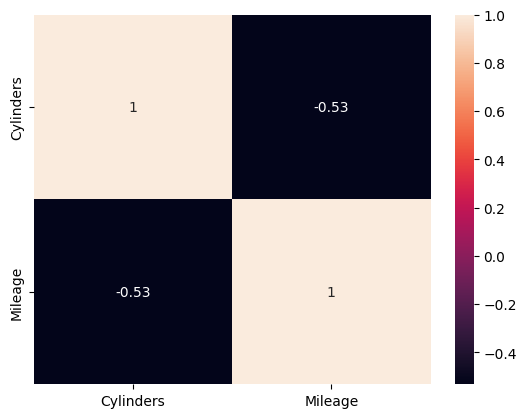

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns , yticklabels = corelation.columns , annot=True)

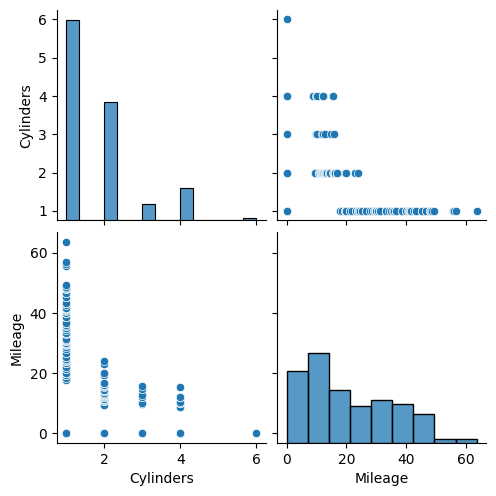

In [28]:
sns.pairplot(df)

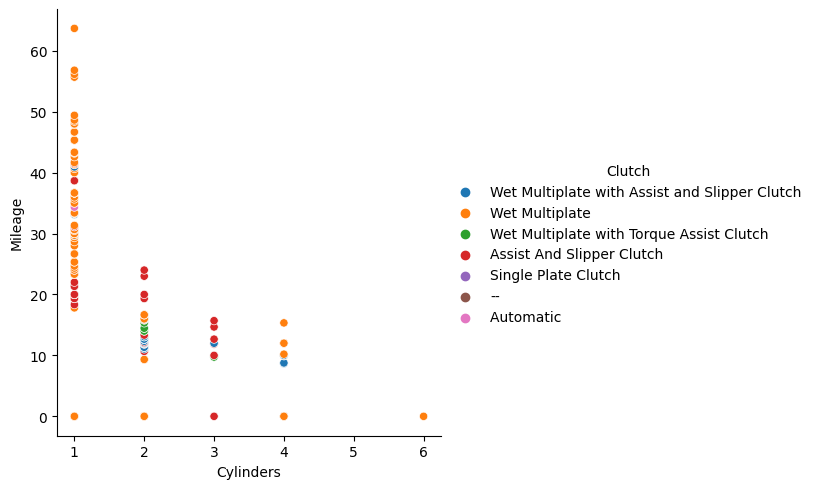

In [37]:
sns.relplot(x = 'Cylinders' , y = 'Mileage' ,  hue = 'Clutch', data=df)

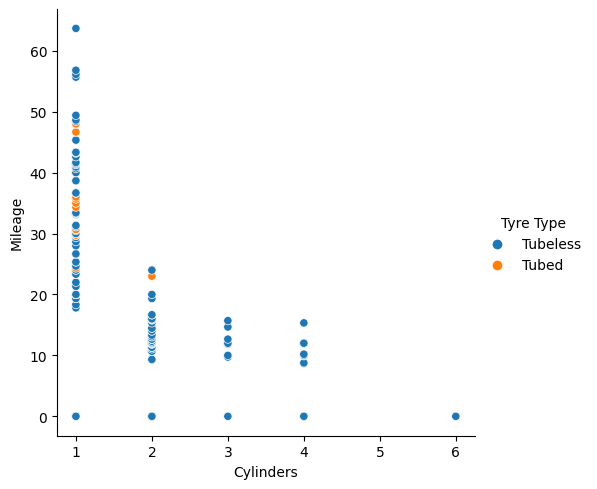

In [38]:
sns.relplot(x = 'Cylinders' , y = 'Mileage' ,  hue = 'Tyre Type', data=df)

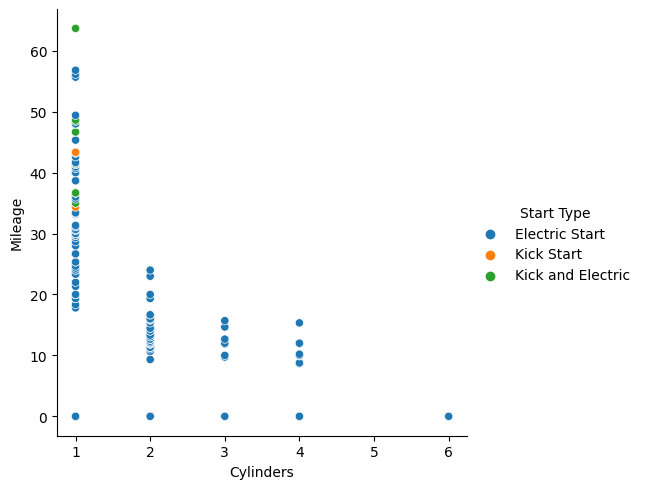

In [49]:
sns.relplot(x = 'Cylinders' , y = 'Mileage' ,  hue = 'Start Type', data=df)

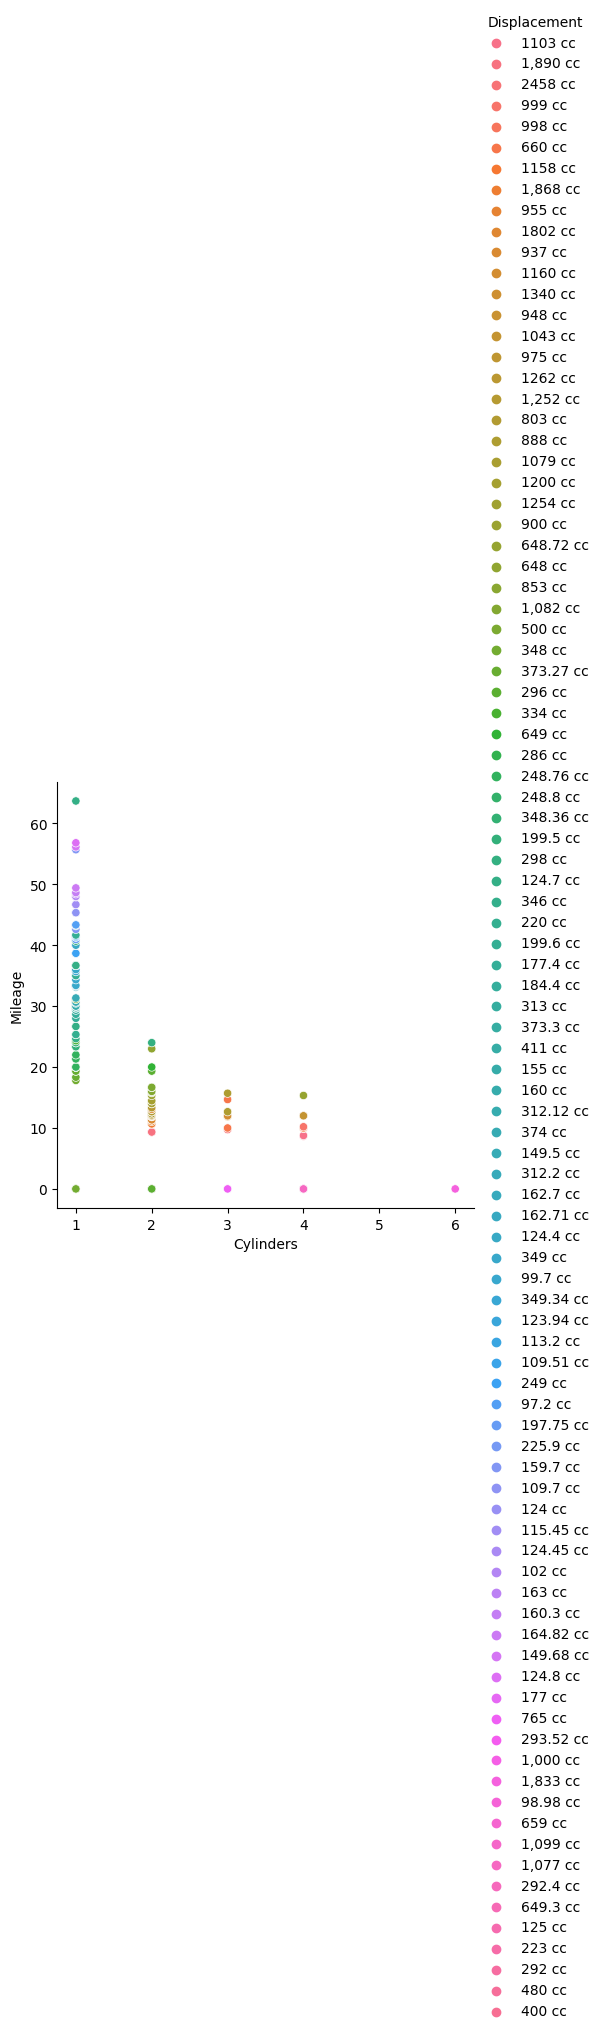

In [34]:
sns.relplot(x = 'Cylinders' , y = 'Mileage' ,  hue = 'Displacement', data=df)

<Axes: xlabel='Mileage', ylabel='Density'>

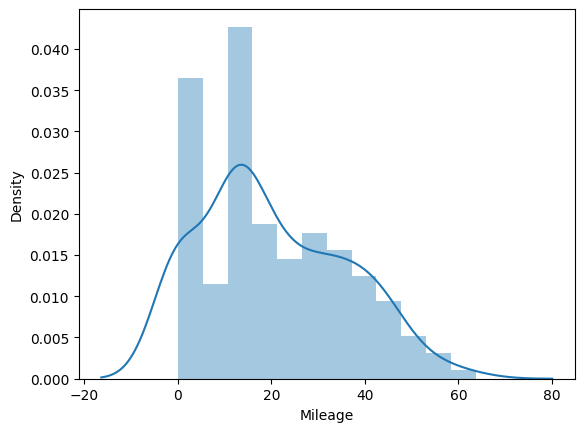

In [40]:
sns.distplot(df['Mileage'] , bins=12)

<Axes: xlabel='Cylinders', ylabel='Density'>

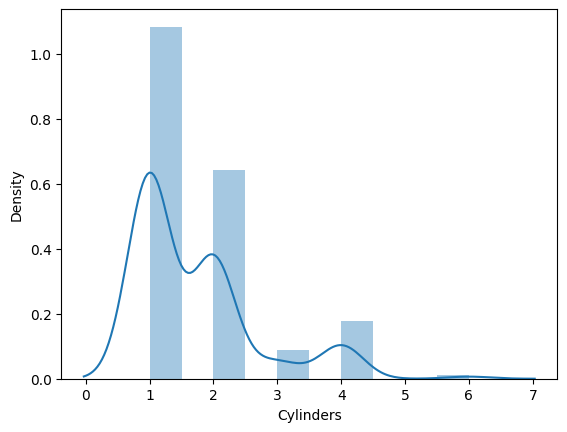

In [46]:
sns.distplot(df['Cylinders'], bins=10)

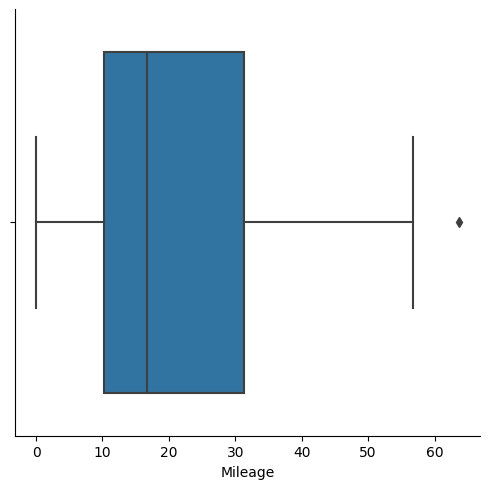

In [47]:
sns.catplot(x='Mileage' , kind='box' , data=df)

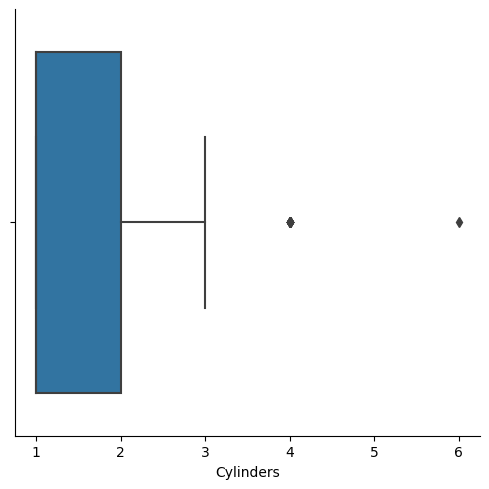

In [51]:
sns.catplot(x='Cylinders' , kind='box' , data=df)

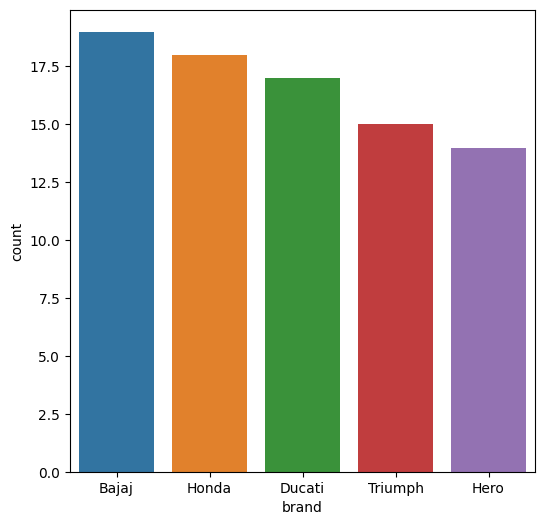

In [52]:
# What are the top 5 brands by the number of bike models they offer?

brand_counts = df['company'].value_counts()
brand_counts = brand_counts.reset_index()
brand_counts.columns = ['brand', 'count']
top_5_brands = brand_counts.head(5)

plt.figure(figsize=(6,6))
sns.barplot(x='brand', y='count', data=top_5_brands)
plt.show()

In [53]:
# What is the average price range of the bikes in our dataset?
def prices(price):
    price = price.replace(',', '')
    if '₹' in price:
        price = price.replace('₹', '')
    price = float(price)
    return price

df['price'] = df['price'].apply(prices)

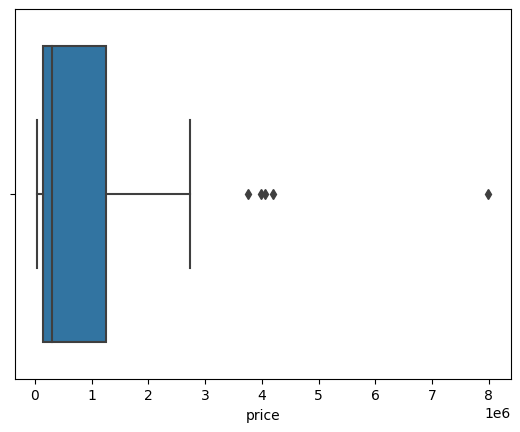

In [54]:
sns.boxplot(x='price', data=df)
plt.show()

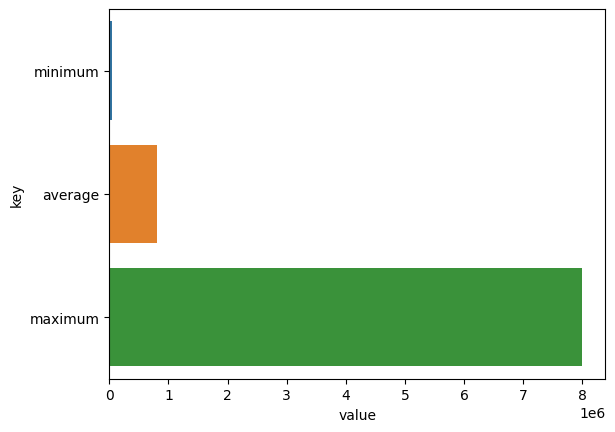

In [55]:
prices_graph = {
    'minimum': min(df['price']),
    'average': np.mean(df['price']),
    'maximum': max(df['price'])
}

prices_graph = pd.DataFrame(prices_graph.items(), columns=['key', 'value'])
sns.barplot(x='value',y='key',data = prices_graph)
plt.show()

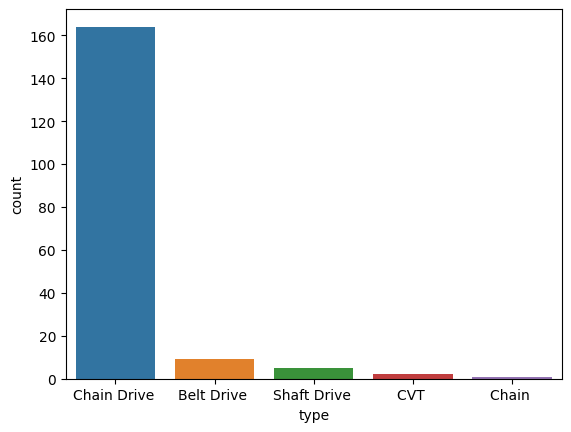

In [56]:
# What is the distribution of the bikes based on their transmission type?
tran_type = df['Transmission Type'].value_counts()
tran_type = pd.DataFrame(tran_type.items(), columns=['type', 'count'])
sns.barplot(x='type', y='count', data=tran_type)
plt.show()

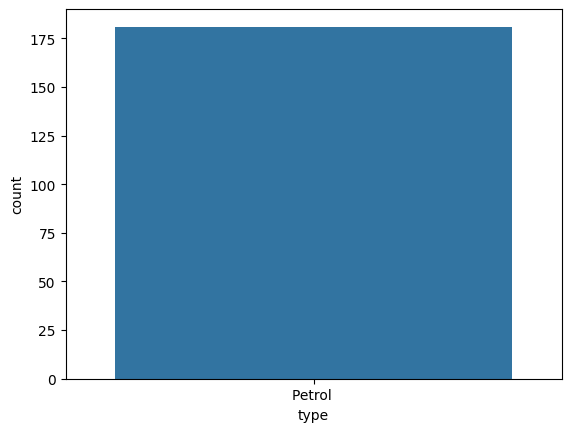

In [57]:
# What is the distribution of the bikes based on their Fuel Type type?
fuel_type = df['Fuel Type'].value_counts()
fuel_type = pd.DataFrame(fuel_type.items(), columns=['type', 'count'])
sns.barplot(x='type', y='count', data=fuel_type)
plt.show()

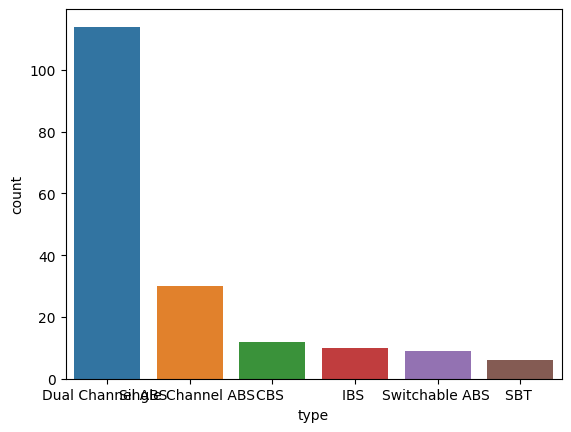

<Figure size 1500x1500 with 0 Axes>

In [64]:
# What is the distribution of the bikes based on their breaking system?
br_type = df['Braking System'].value_counts()
br_type = pd.DataFrame(br_type.items(), columns=['type', 'count'])
sns.barplot(x='type', y='count', data=br_type)
plt.figure(figsize=(15,15))
plt.show()

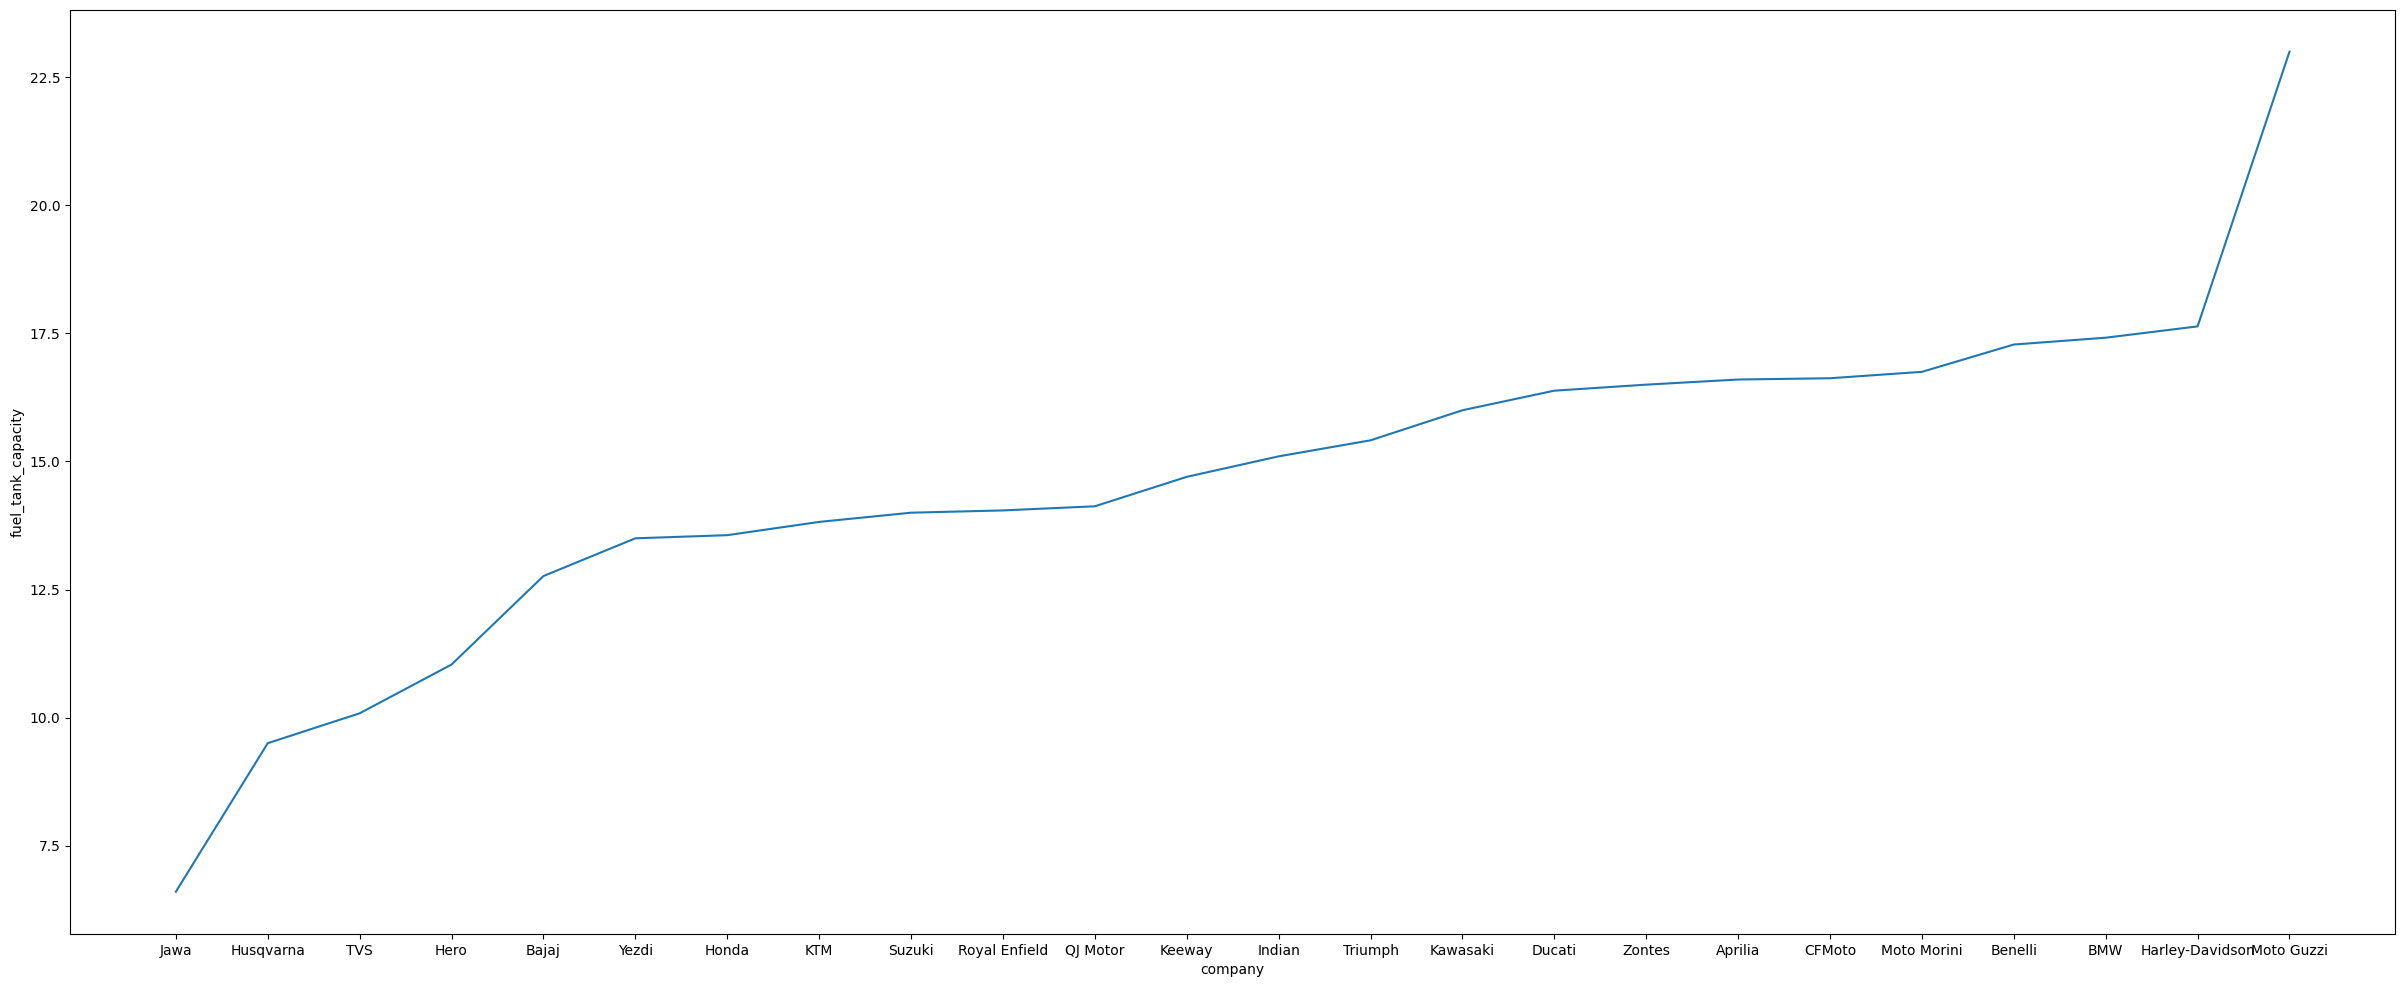

In [65]:
# How does the fuel tank capacity vary with the brand or type of the bikes?
df.rename(columns={'Fuel Tank Capacity': 'fuel_tank_capacity'}, inplace=True)

kw = []
for i in df['fuel_tank_capacity']:
    if '-' not in i:
        kw.append(float(i.split(' ')[0]))
    else:
        kw.append(0)
df['fuel_tank_capacity'] = kw


temp = df.groupby('company')['fuel_tank_capacity'].mean().reset_index()
temp = temp.sort_values(by='fuel_tank_capacity')

plt.figure(figsize=(30,12))
sns.lineplot(x='company',y='fuel_tank_capacity',data=temp)
plt.show()